In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('task_prep.csv', sep=';')
df

,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,-0.372171,1.755587,3.748009,3,3
1,13.225950,3.600102,0.130985,0.053575,-1.946621,1.371272,3.469659,3,1
2,14.603376,5.084047,-0.004651,-0.036299,-1.097486,1.448015,3.855939,3,1
3,26.149905,3.025501,0.229740,0.204591,1.326652,1.937680,2.362421,3,3
4,19.810630,5.020400,-0.011347,-0.028780,-1.248827,1.522902,3.278624,4,3
...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,-1.088837,1.397004,4.758199,4,1
7156,25.363705,4.881059,0.038720,0.054397,0.897137,2.025810,1.823892,4,3
7157,11.160720,5.019859,0.053864,-0.102337,1.603054,2.150058,2.422193,4,3
7158,17.140020,9.269037,0.059911,-0.004299,-1.028902,1.433648,3.715392,4,3


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

In [12]:
#from sklearn.cluster import KMeans
#wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
#    kmeans.fit(df)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

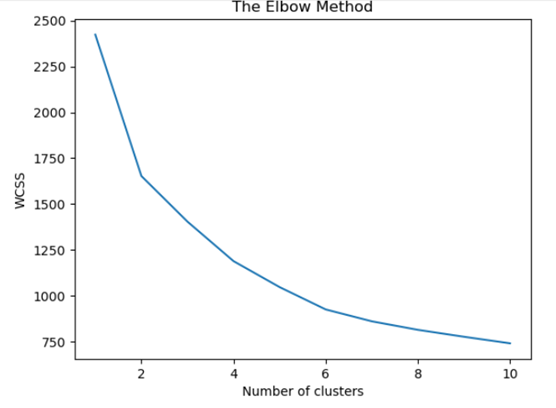

Из-за слышком загруженного кода предупреждениями и прочим доп текстом, возникающим во время выполнения чанки, я закомментрировала сам код, а результаты вывела в виде скрина. Прошу прощение за такой вид кода. 

По результатам видим три явных локтя на уровне значений 2, 4 и 6. Наиболее оптимальным количеством кластеров, исходя из графика, является 4-е кластера, так как после этой итерации плотность элементов снижается с меньшей динамикое, т.е. график становится более пологим. Проверим предположение о к-ве кластеров при помощи метода Силуэтов.

In [13]:
#from sklearn.metrics import silhouette_score
#sil = []
#for k in range(2, 8):
#  kmeans = KMeans(n_clusters = k).fit(df)  
#  preds = kmeans.fit_predict(df)
#  sil.append(silhouette_score(df, preds, metric = 'euclidean'))
#plt.plot(range(2, 8), sil)
#plt.title('Silhouette Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('Sil')
#plt.show()
#for i in range(len(sil)):
# print(str(i+2) +":"+ str(sil[i]))

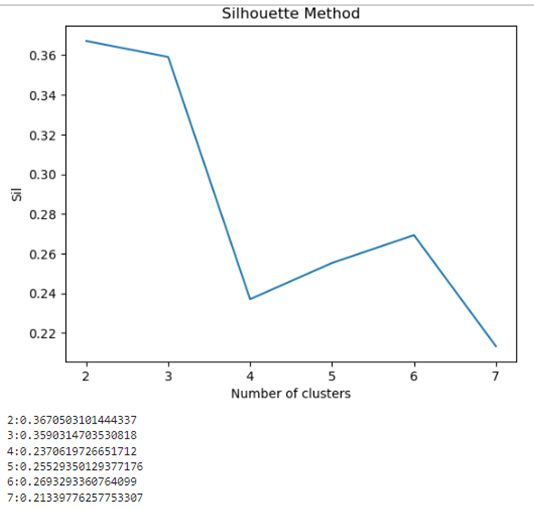

По результатам метода силуэтов можно сделать вывод о том, что лучше всего разбивать выборку на 2 или 3 кластера, так как соответствующие им значения являються самыми высокими. Поэтому проанализируем модели с этими двумя количествами кластеров.

In [14]:
#km2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','product_search_score','ctr_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

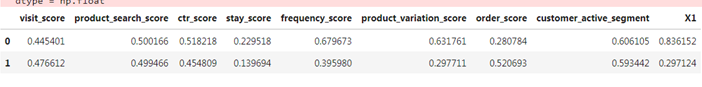

In [15]:
#km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
#kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','product_search_score','ctr_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

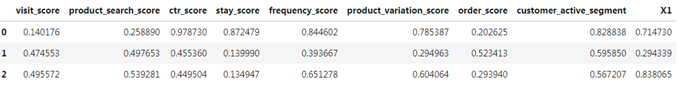

Как в случае с 2-я, так и в случае с 3-я кластерами некоторые переменные практически невариативны, поэтому стоит выделить только значимые параметры. Для этого обратимся к методу классификаци, в котором нам уже приходилось отбирать параметры по их значимости. Таким образом, в датасете стоит оставить переменные frequency_score, product_variation_score, order_score и X1. Если посмотреть на сформированные кластера, то можно заметить, что, действительно, именно эти переменные демонстрируют более четкое деление данных. 

In [16]:
#X = df[:, [4,5,6,8]]

In [17]:
#kmsign2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['frequency_score','product_variation_score','order_score','X1'])

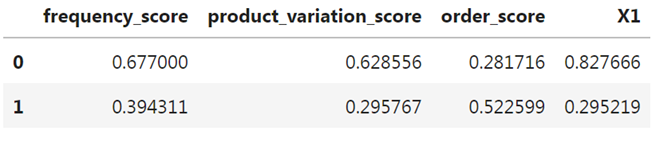

In [18]:
#kmsign3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['frequency_score','product_variation_score','order_score','X1'])

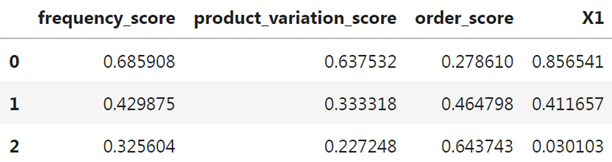

С использованием значимых факторов видим четкую градацию, по которой можно определить кластеры. Таким образом, при разделении на два кластера, видим, что в первую группу попадаю клиенты с високим значением частоты посещаемости сайта (frequency_score), разновидности товаров (product_variation_score), уровнем лояльности клиента (X1), а также с низким уровнем успешных заказов без возврата (order_score). Во второй группе противоположная картина. Смею предположить по логической взаимосвязи характеристик параметров, что оценка order_score имеет обратную шкалу значений, где меньшему числу соответсвует большая результативность, то есть большее число успешных заказов без возвратов. 

Для 3-х кластеров характеристика делений идентична предыдущему описанию, просто появляется ещё одна группа со средними значениями показателей.

И два, и три кластера имеют место быть, более конкретный ответ по поводу того, какое к-во будет оптимальнее можно получить после сравнения результатов кластеризации на основе К-средних с результатами самоорганизующихся карт Кохонена. 

In [11]:
import pickle
obj = {'km2': km2,'km3': km3,'kmsign2': kmsign2,'kmsign3': kmsign3}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()